![](https://www.ladn.eu/wp-content/uploads/2017/11/cdiscount.jpg)

## Jean Marie MANDENG
## Yassine BOUAZZA
## AHMED GOUADER

# *Cdiscount Project*
## <font color='red'>Table of contents</font>
[I-Overview of CDISCOUNT](#I-Overview-of-CDISCOUNT)<br/>
[II-Exploratory Data Analysis ](#II-Exploratory-Data-Analysis)<br/>
   [1-Overview of features](#1-Overview-of-features)<br/>
   [2-Data Visualization and Recommandations](#2-Data-Visualization-and-Recommandations)
   * [Seasonality](#Seasonality)<br/>
   * [Ship mode](#Ship-mode)<br/>
   * [Profit per State](#Profit-per-State)<br/>
   * [Profit per Sub-Category](#Profit-per-Sub-Category)<br/> 
   
   


## I-Overview of CDISCOUNT

[**CDISCOUNT**](https://www.cdiscount.com/) is a french e-commerce company offering several kind of products, such as Tech and house hold appliances, and operate in some countries in Europe.

# II-Exploratory Data Analysis 
### 1-Overview of features
This part is to better understand our dataset so that the analysis will be easier.<br/>
The questions we ask ourselves at this stage are as follows:
* **What are the names of the features?**
* **How many rows and columns are there?**
* **Which features are numerical, which are categorical?**
* **How many values are missing?**
* **Give a summary of the statistics  for numerical features**
    


In [427]:
# Dataset loading
df=pd.read_csv('Sales.csv')

In [426]:
#Import and setting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [372]:
#information about shape of our dataset 
print('Our Dataset has {} Columns,and {} rows '.format(df.columns.value_counts().count(),df.index.value_counts().count()))


Our Dataset has 22 Columns,and 9994 rows 


In [373]:
#3 first rows of our dataset
df.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
#Global informations about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
Order ID         9994 non-null object
Order Date       9994 non-null object
Order Year       9994 non-null int64
Order Quarter    9994 non-null int64
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9983 non-null float64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(4), int64(3), object(15)
memory usage: 1

As we see , there is a future with   **missing values** in our Dataset. let's try to see the percentage of these missing values in order to see if it can prejudice the analysis we'll do.  


In [11]:
#find if there are missing values
print(df.isnull().sum().sort_values(ascending=False).head())

Postal Code    11
Profit          0
Country         0
Order Date      0
Order Year      0
dtype: int64


In [13]:
#now we list them and find their percentage in our data set in oder to no if  can be overlooked(je veux dire négligé en français.lol)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
Missing_value = pd.concat([total, percent], axis=1, keys=['Total_missing', '|Percentage_in_dataset'])
Missing_value.head()

,Total_missing,|Percentage_in_dataset
Postal Code,11,0.001101
Profit,0,0.000000
Country,0,0.000000
Order Date,0,0.000000
Order Year,0,0.000000


As you can see, the percentage of missing value is very low and only concerns the <strong>postal code</strong>  of the cities. We decide  to not remove these values,  because they are not usefull in our analysis.

let's see <strong>numerical and categorical features</strong> and count them .

In [13]:
#categorical features 
print(df.dtypes[df.dtypes == "object"].index)
print('Number of categorical features is:',df.dtypes[df.dtypes == "object"].count())
print('*'*127)
#numerical  feautures 
print(df.dtypes[df.dtypes != "object"].index)
print('Number of numerical feature is:',df.dtypes[df.dtypes != "object"].count())

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')
Number of categorical features is: 15
*******************************************************************************************************************************
Index(['Order Year', 'Order Quarter', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')
Number of numerical feature is: 7


statistical description of some numerical features 

In [592]:
df[['Order Quarter', 'Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Order Quarter,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2.694617,229.858001,3.789574,0.156203,28.656896
std,1.107635,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2.000000,17.280000,2.000000,0.000000,1.728750
50%,3.000000,54.490000,3.000000,0.200000,8.666500
75%,4.000000,209.940000,5.000000,0.200000,29.364000
max,4.000000,22638.480000,14.000000,0.800000,8399.976000


Now that we have seen the structure of our dataset, let's try to have a general idea about the different columns of our dataset to know the:
* **Number of customers,**
* **Number of countries**,
* **Different product categories,**
* **Number of products ,**
* **Different sub-categories of products,**
* **Different modes of delivery,**
* **Different regions ,**
* **Different segments,**
* **Different discount categories,**


##### Number of oders

In [17]:
df['Order ID'].nunique()

5009

There is **5009 oders**

##### Oders years 

In [6]:
df['Order Year'].unique()

array([2018, 2017, 2016, 2019], dtype=int64)

This data represents the orders from **2016 to 2019**.

##### Ship mode 

In [8]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

There is 4 **ships mode** :
   * **Standdart Class**
   * **Second Class**
   * **First Class**
   * **Same Day**

##### Average time for receving the purchased item

In [11]:
round(df['Order Quarter'].mean())

3

The average time for receving the purchased item is **3**. it depend of the ship mode.

##### Number of customers

In [18]:
print ('There is {} customers referenced is this datset' .format(df['Customer ID'].nunique()))

There is 793 customers referenced is this datset


##### Number of Segment

In [21]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

There are **3** differents Segment are :
* **Consumer**
* **Corporate**
* **Home Office**


#### Number of City

In [39]:
print('Our data set is composed of {} City of {}'.format(df['City'].nunique(),df['Country'].unique()))

Our data set is composed of 531 City of ['United States']


##### The differents Region

In [55]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

#### Number of Products

In [47]:
print ('There are {} products purchased'.format(df['Product ID'].nunique()))

There are 1862 products purchased


##### Product Category

In [50]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

There are **3 Categories** of products:
* **Furniture**
* **Office Supplies**
* **Technology**

##### The differents Sub-Categories of Products 

In [52]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### feature engineering

we will try to simplify our dataset by creating other columns that will allow us an easier analysis. we will first begin to transform the column of oder date to extract the months and days of order. this will serve us in the future to make a visualization of data in a more readable way. 

In [374]:
#we look the type of the column of order dates
type(df['Order Date'].iloc[0])

str

As we see the type is string.we can convert it into date time

In [429]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
#now we creat new features
df['Month'] = df['Order Date'].apply(lambda time: time.month)
df['Day of Week'] = df['Order Date'].apply(lambda time: time.dayofweek)

Now let's see our new dataframe

In [377]:
df.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Day of Week
0,CA-2018-152156,2018-08-11,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,5
1,CA-2018-152156,2018-08-11,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,5
2,CA-2018-138688,2018-12-06,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,12,3
3,US-2017-108966,2017-11-10,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,4
4,US-2017-108966,2017-11-10,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11,4


## 2-Data Visualization and Recommandations

### Seasonality

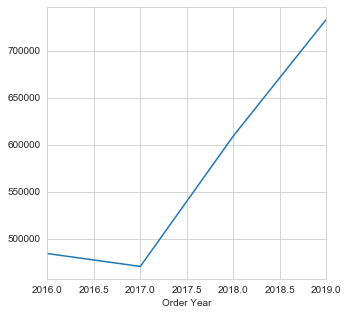

In [597]:
plt.figure(figsize=(5,5))
byyear= df.groupby('Order Year').sum()
byyear['Sales'].plot()

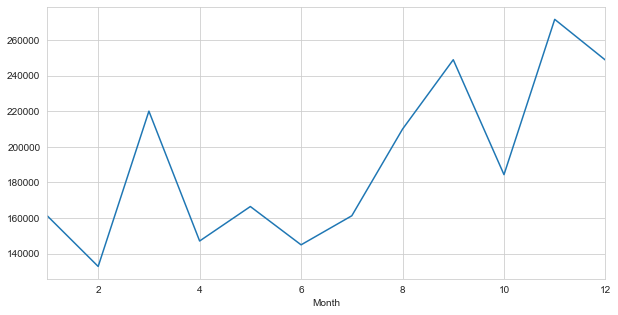

In [480]:
plt.figure(figsize=(10,5))
byMonth = df.groupby('Month').sum()
byMonth['Sales'].plot()

<font color='red'>**Observation** :<br/> We can notice that during each year sales vary where we can see especially in Februray, March, June and September sales decrease dramatically.<br/>

**Recommendation** : 
* Create marketing promotion on Cdiscount products before each month so that we can boost sales before each
dead period.<br/>
* Revise the content of the website before each dead season.<br/>
* Boost customer loyalty by creating cards for loyal customers and provide them a special discount before each month where
sales decrease.</font>


### Ship mode

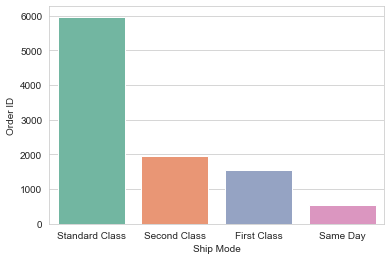

In [575]:
By_Ship=df.groupby('Ship Mode')['Order ID'].count().sort_values(ascending=False).reset_index()
sns.barplot(x='Ship Mode',y='Order ID',data=By_Ship,palette='Set2')


<font color='red'>**Observation** : <br/>From this graph we can notice that most of customers prefer the standard class more than the other ship modes.<br/>
**Recommendation** :<br/> 
 Revise the marketing strategy and current offers of ship modes in order to encourage customers to subscribe to same day or first class
 

### Profit per State

In [430]:
#import librairie for map chart
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [523]:
codes= {'Kentucky':'KY', 'California':'CA', 'Florida':'FL', 'North Carolina':'NC','Washington':'WA', 'Texas':'TX', 'Wisconsin':'WI', 'Utah':'UT', 'Nebraska':'NE','Pennsylvania':'PA', 'Illinois':'IL', 'Minnesota':'MN', 'Michigan':'MI', 'Delaware':'DE','Indiana':'IN', 'New York':'NY', 'Arizona':'AZ', 'Virginia':'VA', 'Tennessee':'TN','Alabama':'AL', 'South Carolina':'SC', 'Oregon':'OR', 'Colorado':'CO', 'Iowa':'IA', 'Ohio':'OH',
       'Missouri':'MO', 'Oklahoma':'OK', 'New Mexico':'NM', 'Louisiana':'LA', 'Connecticut':'CT', 'New Jersey':'NJ', 'Massachusetts':'MA', 'Georgia':'GA', 'Nevada':'NV', 'Rhode Island':'RI',
       'Mississippi':'MS', 'Arkansas':'AR', 'Montana':'MT', 'New Hampshire':'NH', 'Maryland':'MD',
       'District of Columbia':'DC', 'Kansas':'KS', 'Vermont':'VT', 'Maine':'ME',
       'South Dakota':'SD', 'Idaho':'ID', 'North Dakota':'ND', 'Wyoming':'WY',
       'West Virginia':'WV'} 
#we creat a new feature 'code'
df['code']=df['State'].map(codes)
#we group by profit
temp=df.groupby('code')['Profit'].sum().sort_values(ascending=False).reset_index()
fig = go.Figure(data=go.Choropleth(
    locations=temp['code'],
    z=temp['Profit'],
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    #text=temp['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Profit"
))

fig.update_layout(
    title_text='Profit per State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, 
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()


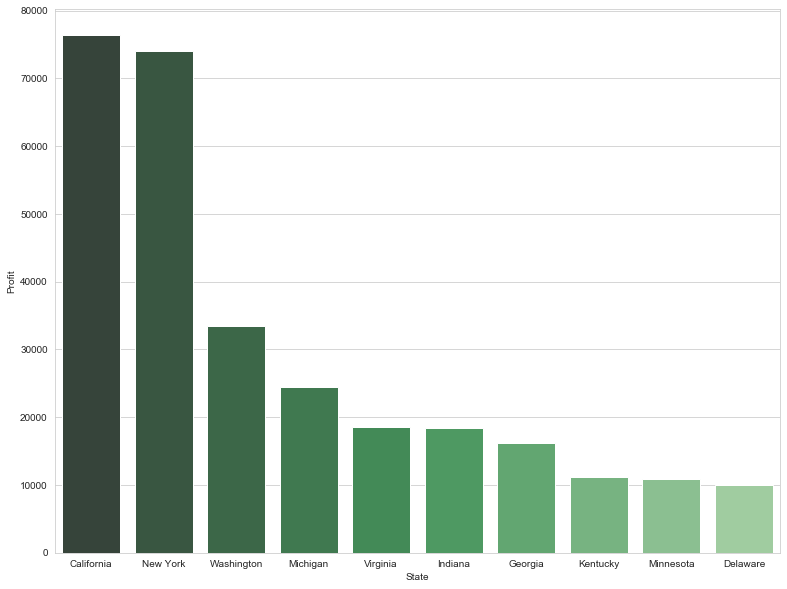

In [521]:
#Top 10 state's profit
By_State=df.groupby('State')
Top_10_state=By_State['Profit'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(13,10))
sns.barplot(data=Top_10_state,x='State',y='Profit',palette="Greens_d")

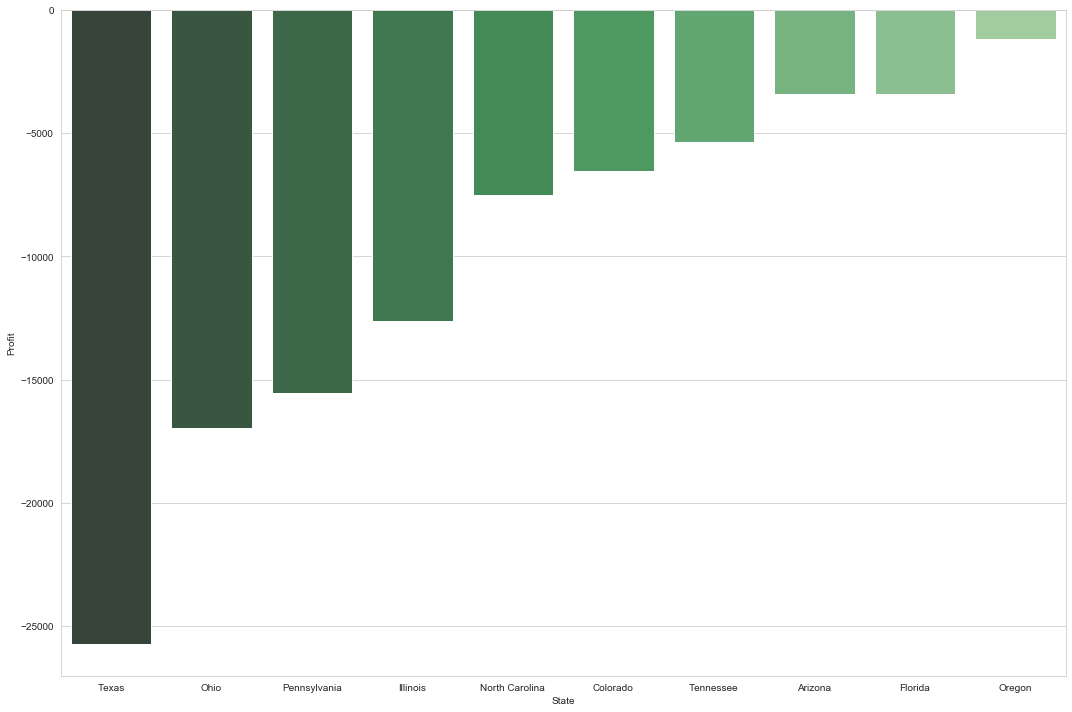

In [620]:
# The last 10 State with bad profit
plt.figure(figsize=(15,10))
By_State=df.groupby('State')
Top_10=By_State['Profit'].sum().sort_values(ascending=True).reset_index().head(10)
sns.barplot(data=Top_10,x='State',y='Profit',palette="Greens_d")
plt.tight_layout()

 <font color='red'> **Observation** : We can observe from these graphs that there are 10 states with negative profit thus it requires some recommendations in order to boost profit there.<br/>
  **Recommendation** : In order to increase profit in states such as Texaas, Ohio, Pennsylvania..<br>
    We should follow some steps like :
   * Reduce the discount in such places where we are not making enough revenue
   * Make advertising and events to promote Cdiscount products and gain more customers
    

### Profit per Sub-Category

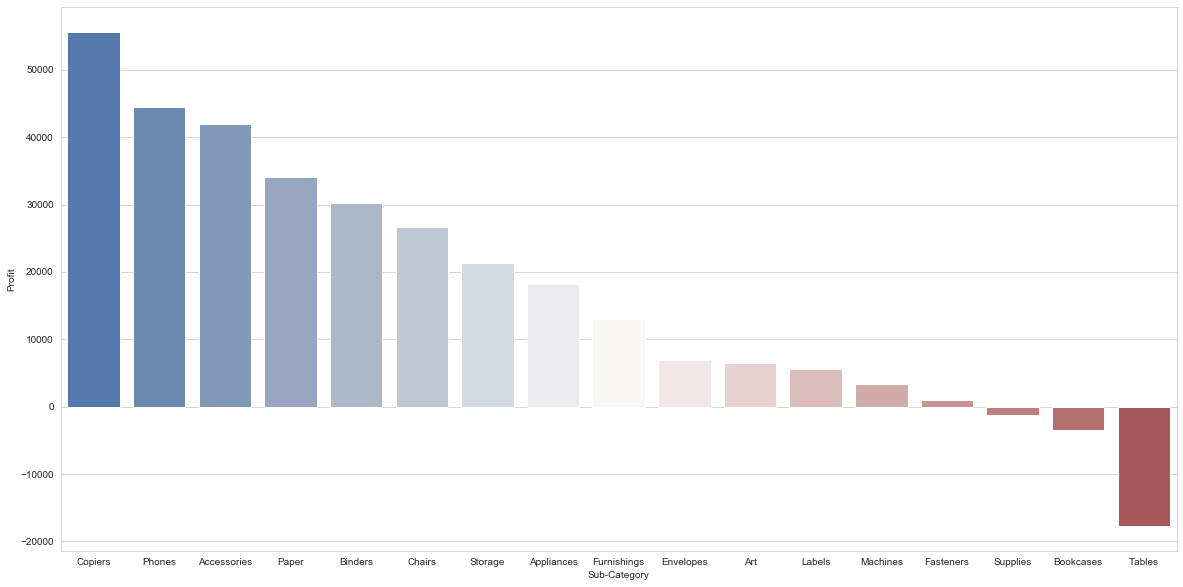

In [470]:
plt.figure(figsize=(20,10))
by_Subcategory=df.groupby('Sub-Category')
Sub_profit=by_Subcategory['Profit'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=Sub_profit,x='Sub-Category',y='Profit',ci=None,palette='vlag')

<font color='red'>**Observation** : Tables are the main unprofitable Sub-category in the Sub-categories that Cdiscount offer.<br>
**Recommendation** : 
 * Better selection of products 
 * Monthly promotional compaign in the category of products such as Tables, Bookcases and Supplies.
 * Associating some events where Cdiscount can create special promotions in order to get rid of unprofitable products